In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("BRCA.csv")

In [3]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [5]:
df.shape

(341, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [7]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'FEMALE' else 0)
df['ER status'] = df['ER status'].apply(lambda x: 1 if x == 'Positive' else 0)
df['PR status'] = df['PR status'].apply(lambda x: 1 if x == 'Positive' else 0)
df['HER2 status'] = df['HER2 status'].apply(lambda x: 1 if x == 'Positive' else 0)
df['Patient_Status'] = df['Patient_Status'].apply(lambda x: 1 if x == 'Alive' else 0)

In [8]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,1,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,1,1,0,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,1
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,1,1,0,Lumpectomy,26-Apr-17,09-Nov-18,0
2,TCGA-A8-A079,69.0,1,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,1,1,0,Other,08-Sep-17,09-Jun-18,1
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,1,1,0,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,1
4,TCGA-BH-A0BF,56.0,1,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,1,1,0,Other,06-May-17,27-Jun-19,0


In [9]:
frekanslar = df['Histology'].value_counts()
print(frekanslar)

Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
Name: Histology, dtype: int64


In [10]:
atama_sozlugu = {
    'Infiltrating Ductal Carcinoma': 2,
    'Infiltrating Lobular Carcinoma': 1,
    'Mucinous Carcinoma': 0
}
df['Histology'] = df['Histology'].map(atama_sozlugu)

In [11]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,1,0.080353,0.42638,0.54715,0.273680,III,2.0,1,1,0,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,1
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.57807,0.61447,-0.031505,II,0.0,1,1,0,Lumpectomy,26-Apr-17,09-Nov-18,0
2,TCGA-A8-A079,69.0,1,0.213980,1.31140,-0.32747,-0.234260,III,2.0,1,1,0,Other,08-Sep-17,09-Jun-18,1
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.21147,-0.19304,0.124270,II,2.0,1,1,0,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,1
4,TCGA-BH-A0BF,56.0,1,0.221550,1.90680,0.52045,-0.311990,II,2.0,1,1,0,Other,06-May-17,27-Jun-19,0


In [12]:
frekanslar = df['Surgery_type'].value_counts()
print(frekanslar)

Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: Surgery_type, dtype: int64


In [13]:
atama_sozlugu1 = {
    'Other': 2,
    'Modified Radical Mastectomy': 1,
    'Simple Mastectomy': 0,
    'Lumpectomy':3
}
df['Surgery_type'] = df['Surgery_type'].map(atama_sozlugu1)

In [14]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,1,0.080353,0.42638,0.54715,0.273680,III,2.0,1,1,0,1.0,15-Jan-17,19-Jun-17,1
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.57807,0.61447,-0.031505,II,0.0,1,1,0,3.0,26-Apr-17,09-Nov-18,0
2,TCGA-A8-A079,69.0,1,0.213980,1.31140,-0.32747,-0.234260,III,2.0,1,1,0,2.0,08-Sep-17,09-Jun-18,1
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.21147,-0.19304,0.124270,II,2.0,1,1,0,1.0,25-Jan-17,12-Jul-17,1
4,TCGA-BH-A0BF,56.0,1,0.221550,1.90680,0.52045,-0.311990,II,2.0,1,1,0,2.0,06-May-17,27-Jun-19,0


In [15]:
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'], format='%d-%b-%y')
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'], format='%d-%b-%y')


In [16]:
df['Gun_Farki'] = (df['Date_of_Last_Visit'] - df['Date_of_Surgery']).dt.days


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient_ID          334 non-null    object        
 1   Age                 334 non-null    float64       
 2   Gender              341 non-null    int64         
 3   Protein1            334 non-null    float64       
 4   Protein2            334 non-null    float64       
 5   Protein3            334 non-null    float64       
 6   Protein4            334 non-null    float64       
 7   Tumour_Stage        334 non-null    object        
 8   Histology           334 non-null    float64       
 9   ER status           341 non-null    int64         
 10  PR status           341 non-null    int64         
 11  HER2 status         341 non-null    int64         
 12  Surgery_type        334 non-null    float64       
 13  Date_of_Surgery     334 non-null    datetime64[ns]

In [18]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gun_Farki
0,TCGA-D8-A1XD,36.0,1,0.080353,0.42638,0.54715,0.273680,III,2.0,1,1,0,1.0,2017-01-15,2017-06-19,1,155.0
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.57807,0.61447,-0.031505,II,0.0,1,1,0,3.0,2017-04-26,2018-11-09,0,562.0
2,TCGA-A8-A079,69.0,1,0.213980,1.31140,-0.32747,-0.234260,III,2.0,1,1,0,2.0,2017-09-08,2018-06-09,1,274.0
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.21147,-0.19304,0.124270,II,2.0,1,1,0,1.0,2017-01-25,2017-07-12,1,168.0
4,TCGA-BH-A0BF,56.0,1,0.221550,1.90680,0.52045,-0.311990,II,2.0,1,1,0,2.0,2017-05-06,2019-06-27,0,782.0


In [19]:
frekanslar = df['Tumour_Stage'].value_counts()
print(frekanslar)

II     189
III     81
I       64
Name: Tumour_Stage, dtype: int64


In [20]:
atama_sozlugu2 = {
    'III': 2,
    'II': 1,
    'I': 0
}
df['Tumour_Stage'] = df['Tumour_Stage'].map(atama_sozlugu2)

In [22]:
df.head(20)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gun_Farki
0,TCGA-D8-A1XD,36.0,1,0.080353,0.426380,0.547150,0.273680,2.0,2.0,1,1,0,1.0,2017-01-15,2017-06-19,1,155.0
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.578070,0.614470,-0.031505,1.0,0.0,1,1,0,3.0,2017-04-26,2018-11-09,0,562.0
2,TCGA-A8-A079,69.0,1,0.213980,1.311400,-0.327470,-0.234260,2.0,2.0,1,1,0,2.0,2017-09-08,2018-06-09,1,274.0
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.211470,-0.193040,0.124270,1.0,2.0,1,1,0,1.0,2017-01-25,2017-07-12,1,168.0
4,TCGA-BH-A0BF,56.0,1,0.221550,1.906800,0.520450,-0.311990,1.0,2.0,1,1,0,2.0,2017-05-06,2019-06-27,0,782.0
5,TCGA-AO-A1KQ,84.0,0,-0.081872,1.724100,-0.057335,0.043025,2.0,2.0,1,1,0,1.0,2017-09-18,2021-11-15,1,1519.0
6,TCGA-D8-A73X,53.0,1,-0.069535,1.418300,-0.361050,0.391580,1.0,2.0,1,1,0,0.0,2017-02-04,2018-02-07,1,368.0
7,TCGA-A7-A426,50.0,1,0.672490,1.279000,-0.321070,-0.112390,2.0,2.0,1,1,0,0.0,2017-05-16,NaT,0,NaN
8,TCGA-EW-A1P5,77.0,1,-0.151750,-0.663320,1.189400,0.217180,1.0,2.0,1,1,0,1.0,2017-09-28,2018-09-28,1,365.0
9,TCGA-A8-A09A,40.0,1,-0.565700,1.266800,-0.293460,0.193950,1.0,1.0,1,1,1,2.0,2017-02-14,2017-12-15,1,304.0


In [23]:
df.fillna(0, inplace=True)

In [25]:
df.head(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Gun_Farki
0,TCGA-D8-A1XD,36.0,1,0.080353,0.42638,0.547150,0.273680,2.0,2.0,1,1,0,1.0,2017-01-15 00:00:00,2017-06-19 00:00:00,1,155.0
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.57807,0.614470,-0.031505,1.0,0.0,1,1,0,3.0,2017-04-26 00:00:00,2018-11-09 00:00:00,0,562.0
2,TCGA-A8-A079,69.0,1,0.213980,1.31140,-0.327470,-0.234260,2.0,2.0,1,1,0,2.0,2017-09-08 00:00:00,2018-06-09 00:00:00,1,274.0
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.21147,-0.193040,0.124270,1.0,2.0,1,1,0,1.0,2017-01-25 00:00:00,2017-07-12 00:00:00,1,168.0
4,TCGA-BH-A0BF,56.0,1,0.221550,1.90680,0.520450,-0.311990,1.0,2.0,1,1,0,2.0,2017-05-06 00:00:00,2019-06-27 00:00:00,0,782.0
5,TCGA-AO-A1KQ,84.0,0,-0.081872,1.72410,-0.057335,0.043025,2.0,2.0,1,1,0,1.0,2017-09-18 00:00:00,2021-11-15 00:00:00,1,1519.0
6,TCGA-D8-A73X,53.0,1,-0.069535,1.41830,-0.361050,0.391580,1.0,2.0,1,1,0,0.0,2017-02-04 00:00:00,2018-02-07 00:00:00,1,368.0
7,TCGA-A7-A426,50.0,1,0.672490,1.27900,-0.321070,-0.112390,2.0,2.0,1,1,0,0.0,2017-05-16 00:00:00,0,0,0.0
8,TCGA-EW-A1P5,77.0,1,-0.151750,-0.66332,1.189400,0.217180,1.0,2.0,1,1,0,1.0,2017-09-28 00:00:00,2018-09-28 00:00:00,1,365.0
9,TCGA-A8-A09A,40.0,1,-0.565700,1.26680,-0.293460,0.193950,1.0,1.0,1,1,1,2.0,2017-02-14 00:00:00,2017-12-15 00:00:00,1,304.0


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

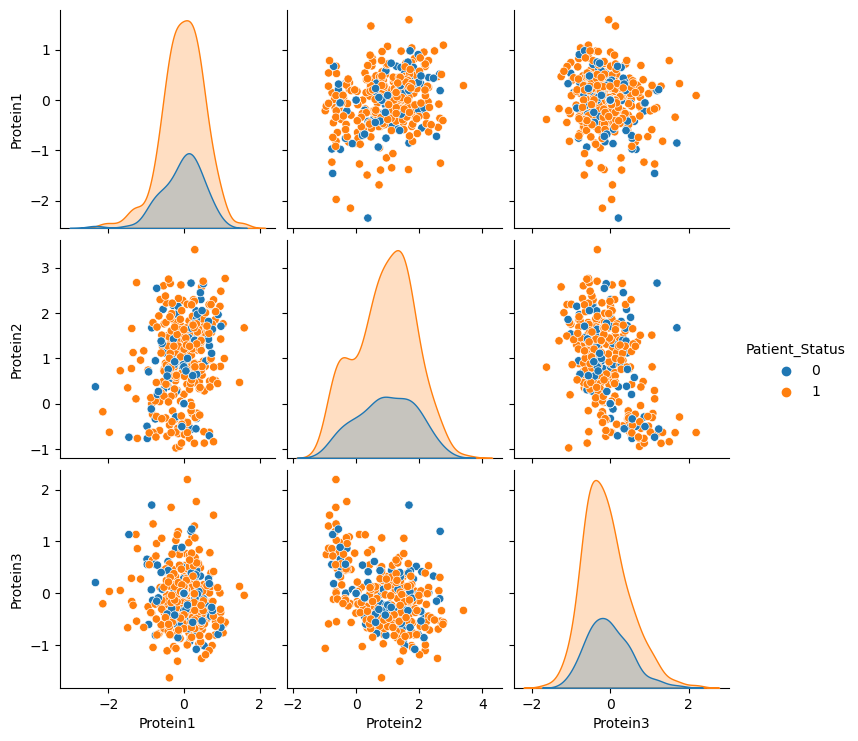

In [29]:
sns.pairplot(df, hue='Patient_Status', vars=['Protein1', 'Protein2', 'Protein3'], diag_kind='kde')
plt.show()

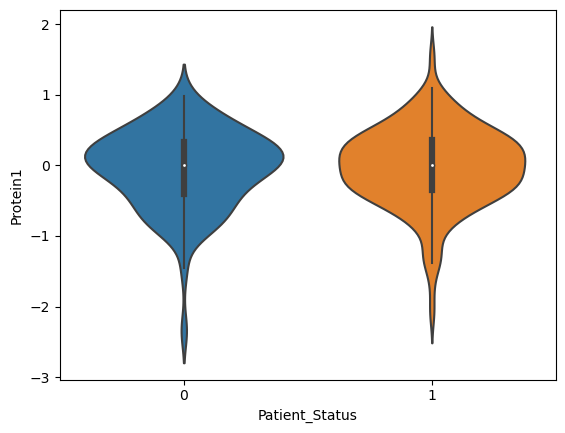

In [30]:
sns.violinplot(x='Patient_Status', y='Protein1', data=df)
plt.show()


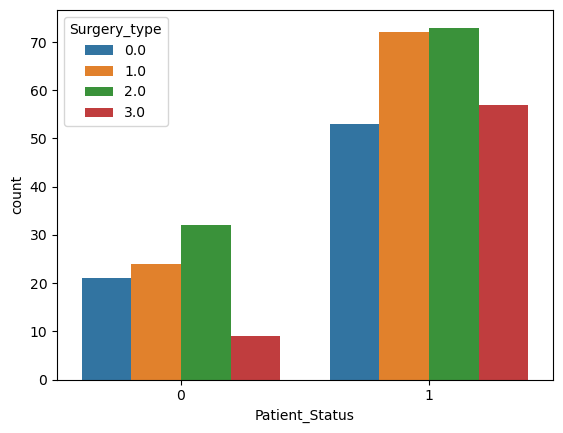

In [31]:
sns.countplot(x='Patient_Status', hue='Surgery_type', data=df)
plt.show()

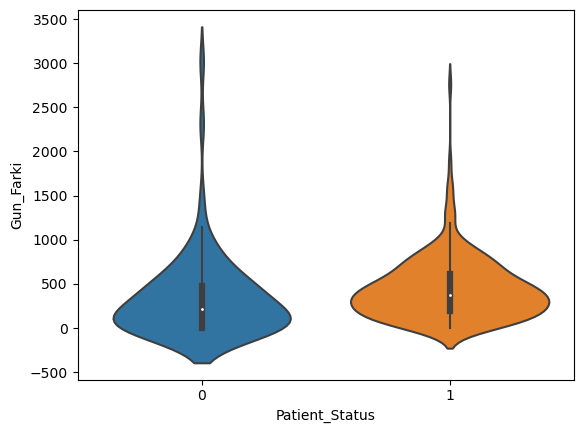

In [32]:
sns.violinplot(x='Patient_Status', y='Gun_Farki', data=df)
plt.show()

In [33]:
#outliers = df.quantile(.97)
#df = df[(df['']<outliers[''])]
#df = df[(df['']<outliers[''])]
#df = df[(df['s']<outliers[''])]

In [44]:
df[['Date_of_Surgery', 'Date_of_Last_Visit']] = df[['Date_of_Surgery', 'Date_of_Last_Visit']].astype(float)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [53]:
x = df.drop(['Patient_Status', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_ID'], axis=1)

y=df[["Patient_Status"]]

In [54]:
print(x.columns)

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Gun_Farki'],
      dtype='object')


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [56]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((272, 13), (69, 13), (272, 1), (69, 1))

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          341 non-null    object 
 1   Age                 341 non-null    float64
 2   Gender              341 non-null    int64  
 3   Protein1            341 non-null    float64
 4   Protein2            341 non-null    float64
 5   Protein3            341 non-null    float64
 6   Protein4            341 non-null    float64
 7   Tumour_Stage        341 non-null    float64
 8   Histology           341 non-null    float64
 9   ER status           341 non-null    int64  
 10  PR status           341 non-null    int64  
 11  HER2 status         341 non-null    int64  
 12  Surgery_type        341 non-null    float64
 13  Date_of_Surgery     341 non-null    object 
 14  Date_of_Last_Visit  341 non-null    object 
 15  Patient_Status      341 non-null    int64  
 16  Gun_Fark

In [58]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [59]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [60]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.139669,0.426790,0.315969
Ridge,0.019698,0.455576,0.374133
Linear,-0.002262,0.460651,0.375181
XGradientBooting,-0.012223,0.462934,0.335354
ElasticNet,-0.016824,0.463985,0.391553
Lasso,-0.021429,0.465035,0.393246
Extra Tree,-0.574405,0.577350,0.333333


In [61]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [62]:
l.fit(x,y)

LogisticRegression()

In [63]:
tahmin4=l.predict(x)

In [83]:
accuracy_score(tahmin4,y)

0.7683284457478006

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [66]:
confusion_matrix(tahmin4,y)

array([[  7,   0],
       [ 79, 255]])

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [68]:
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [69]:
tahmin1=g.predict(x)
tahmin2=b.predict(x)

In [70]:
accuracy_score(tahmin1,y)

0.7653958944281525

In [71]:
confusion_matrix(tahmin1,y)

array([[  9,   3],
       [ 77, 252]])

In [72]:
print(classification_report(tahmin1,y))

              precision    recall  f1-score   support

           0       0.10      0.75      0.18        12
           1       0.99      0.77      0.86       329

    accuracy                           0.77       341
   macro avg       0.55      0.76      0.52       341
weighted avg       0.96      0.77      0.84       341



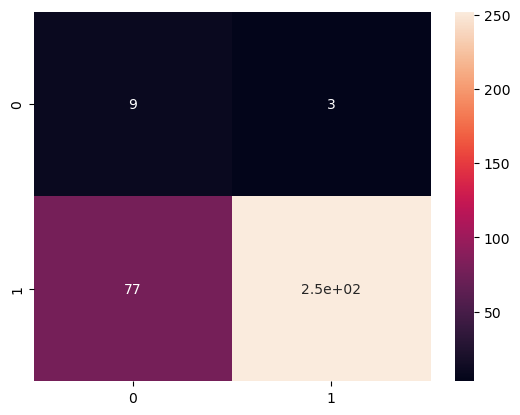

In [73]:
sns.heatmap(confusion_matrix(tahmin1,y),annot=True);

In [74]:
accuracy_score(tahmin2,y)

0.8152492668621701

<Axes: >

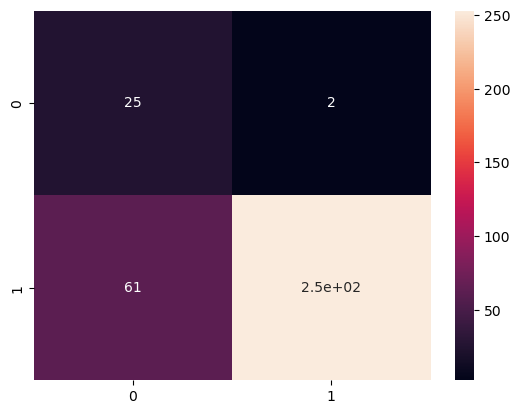

In [75]:
sns.heatmap(confusion_matrix(tahmin2,y),annot=True)

In [76]:
confusion_matrix(tahmin2,y)

array([[ 25,   2],
       [ 61, 253]])

In [77]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [78]:
k.fit(x,y)

KNeighborsClassifier()

In [79]:
tahmin3=k.predict(x)

In [80]:
accuracy_score(tahmin3,y)

0.8211143695014663

In [81]:
confusion_matrix(tahmin3,y)

array([[ 32,   7],
       [ 54, 248]])

In [82]:
print(classification_report(tahmin3,y))

              precision    recall  f1-score   support

           0       0.37      0.82      0.51        39
           1       0.97      0.82      0.89       302

    accuracy                           0.82       341
   macro avg       0.67      0.82      0.70       341
weighted avg       0.90      0.82      0.85       341



In [84]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [85]:
d.fit(x,y)
# overfitting undercutting

DecisionTreeClassifier()

In [86]:
tahmin5=d.predict(x)

In [87]:
accuracy_score(tahmin5,y)

1.0

In [88]:
confusion_matrix(tahmin5,y)

array([[ 86,   0],
       [  0, 255]])

In [89]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [90]:
r.fit(x,y)

RandomForestClassifier()

In [91]:
tahmin6=r.predict(x)

In [92]:
accuracy_score(tahmin6,y)

1.0

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [94]:
gb.fit(x,y)

GradientBoostingClassifier()

In [95]:
tahmin7=gb.predict(x)

In [96]:
accuracy_score(tahmin7,y)

0.9501466275659824

In [97]:
confusion_matrix(tahmin7,y)

array([[ 69,   0],
       [ 17, 255]])